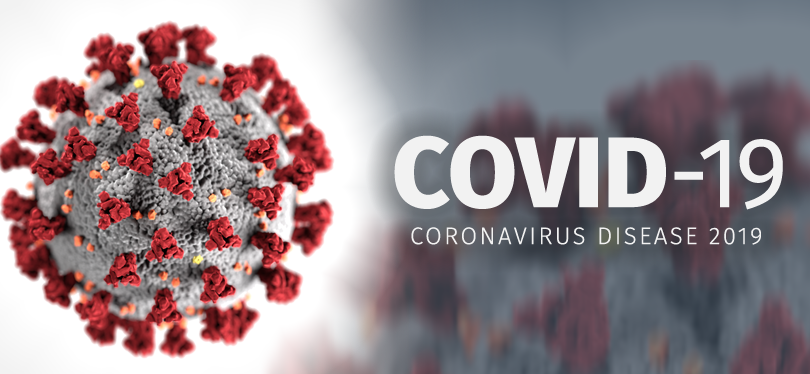

In [3]:
from IPython.display import Image
Image("../input/images/Images/Covid-19.png")

# Context

### Novel Coronavirus 2019 (nCoV-2019) is a virus which affects respiratory system and was first discovered in wuhan, China. Some early reports suggested that virus may have been transmitted from animal to person. As we know whole world has been shutdown  because of the widespread cases. At this time it's unclear how easily or sustainably this virus is spreading between people.

Two Datasets are used:

1. Dataset obtained using ncov2019.live website
2. Time series Data from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'


 - For the purpose of this notebook i have saved the data after scrapping it from the first source as it was not working in the kaggle notebbook.
 - If you want to get latest model predictions than please uncomment the section stating (# Use this code in your notebook and it'll fetch data directly from ncov2019 website. For this notebook. I'm using a copy of the same). and comment the section stating (#Saved Data)
 
 - If you have any Queries please leave a comment

#### Lets import all the dependencies for scrapping the website

In [4]:
import pandas as pd
# import requests
# import bs4
# from urllib.request import Request, urlopen
# from urllib.request import urlopen as uReq
# from bs4 import BeautifulSoup as soup
# import pandas as pd

#### Dataset used

In [5]:
pd.read_excel('../input/covid-predictions/covid_data/Data/meta/covid_data.xlsx')

,Data Used,Info,Link
0,nCoV2019.live,This data has been scraped from nCoV2019.live....,https://ncov2019.live/
1,Confirmed cases dataframe,This data is a time series representation of c...,https://raw.githubusercontent.com/CSSEGISandDa...


In [ ]:
# Use this code in your notebook and it'll fetch data directly from ncov2019 website. For this notebook. I'm using a copy 
#of the same

# # grabbing the url

# url = "https://ncov2019.live/"
# req = Request(url, headers={"User-Agent" : "Mozilla/5.0"})

# webpage = urlopen(req).read()

# #parsing it as lxml
# pagesoup = soup(webpage,"lxml")


#finding the relevant tags to scrap the data from website

# website_name = pagesoup.find('a',class_ = "navbar-brand")
# link = "https://ncov2019.live/"
# Markdown('<strong>{}</strong>{}'.format(website_name.text,link))

#some quick facts from the website

# quickfacts = pagesoup.find('div', class_ = "container--wrap bg-navy-4")
# Markdown('<strong align="center">{}</strong>'.format(quickfacts))

# Current Cases (WorldWide)
### To know how bad the world has been affected lets get some information on current situation.

## World COVID-19 Stats

#### We will scrap worldwide covid cases.
1. We'll use pandas read.html which lets us read the webpage table without much of complexity.
2. Convert the table into dataframe for further processing.
3. In the header of the list generated you see a number "1", which was used in the original website as a filter for arranging data in ascending or descending order.

In [ ]:
# Use this code in your notebook and it'll fetch data directly from ncov2019 website. For this notebook. I'm using a copy 
#of the same

# # grabbing latest worldwide data

# url = "https://ncov2019.live/data/world"

# r = requests.get(url)
# df_list = pd.read_html(r.text)            #this parse all html tables from a webpage to alist
# world_df = df_list[2]
# world_df

In [6]:
#Saved Data

world_df = pd.read_csv('../input/covid-predictions/covid_data/Data/Covid-19/ncov2019_data.csv')
world_df.head()

,Unnamed: 0,Name,Confirmed,Per Million,Changes Today,Percentage Day Change,Critical,Deceased,Per Million.1,Changes Today.1,Percentage Death Change,Tests,Active,Recovered,Per Million.2,Population,mortality,recovery
0,0,TOTAL,60649357,7786,553912,0.92%,103594,1425006,183,11142,0.79%,973759372,17660840,41393796.0,5314,7789595020,2.349581,68.251006
1,171,★ United States,13104592,39498,147533,1.14%,23734,267924,808,2005,0.75%,185704305,5121937,7714731.0,23253,331780397,2.044505,58.870440
2,172,★ India,9266697,6689,44699,0.48%,8944,135261,98,518,0.38%,134841307,453450,8677986.0,6264,1385419430,1.459646,93.647024
3,173,★ Brazil,6166606,28929,45157,0.74%,8318,170769,801,590,0.35%,21900000,519819,5476018.0,25689,213164112,2.769254,88.801166
4,57,★ France,2170097,33217,16282,0.76%,4148,50618,775,381,0.76%,20098815,1962927,156552.0,2396,65331590,2.332522,7.214055


#### Sorting the data on number of confirmed cases

In [7]:
# We will now sort the countries based on total confirmed cases column

world_df = world_df.sort_values("Confirmed" , ascending = False)



#Lets get top 10 affected countries

# world_df.head(10)


#### Lets see many coulmns are missing values.

In [8]:
world_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 0 to 219
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               220 non-null    int64  
 1   Name                     220 non-null    object 
 2   Confirmed                220 non-null    int64  
 3   Per Million              220 non-null    object 
 4   Changes Today            220 non-null    int64  
 5   Percentage Day Change    220 non-null    object 
 6   Critical                 220 non-null    object 
 7   Deceased                 220 non-null    int64  
 8   Per Million.1            220 non-null    object 
 9   Changes Today.1          220 non-null    int64  
 10  Percentage Death Change  220 non-null    object 
 11  Tests                    220 non-null    int64  
 12  Active                   220 non-null    object 
 13  Recovered                215 non-null    float64
 14  Per Million.2            2

#### Lets import seaborn as well as matplotlib

In [9]:
#We can also visualize the same using seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

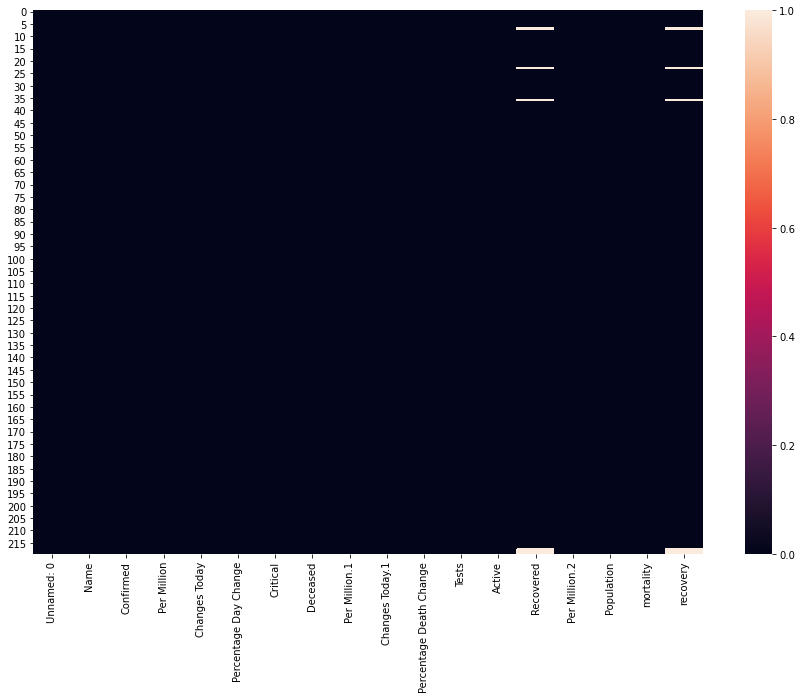

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(world_df.isnull())

#### We'll use plotly express for visualization.
1. It generates graphs which are interactive and user friendly.
2. We can use zoom in and zoom out feature for proper understanding to a specific part of graph.

In [13]:
import plotly.express as px
# import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#### Plot number of confirmed cases.

In [98]:
init_notebook_mode (connected = True)

In [99]:
# plotting world_df based on confirmed cases by country names.

world_fig = px.bar(world_df, x = 'Name' , y = 'Confirmed')
world_fig.show()

 - We can zoom in the graph, thats the beauty of plotly.

In [100]:
# Lets plot top 20 countries based on confirmed cases.

world_fig = px.bar(world_df.head(20), x = "Name" , y = 'Confirmed')
world_fig.show()

 - Now we can see United states holds number 1 position. (cough cough "we don't wear masks" - americans)
 - Brazil and India comes at the second and third position surpassing Russia respectively.

#### Now we'll try to explore the world_df in more details.(based on number of Deceased People)

In [101]:
# Lets see how many people have died with respect to countries. (For top 20 countries)

world_fig = px.bar(world_df.head(20), x = 'Name', y = 'Confirmed', color = "Deceased")
world_fig.show()

 - Here the color of each bar corrosponds to how many people have died.
 - We cannot make out which country has most number of deceased people in a descending order.

In [102]:
# lets grab the world_df based on deceased column.
world_df.sort_values('Deceased',ascending = False)

,Unnamed: 0,Name,Confirmed,Per Million,Changes Today,Percentage Day Change,Critical,Deceased,Per Million.1,Changes Today.1,Percentage Death Change,Tests,Active,Recovered,Per Million.2,Population,mortality,recovery
0,0,TOTAL,60649357,7786,553912,0.92%,103594,1425006,183,11142,0.79%,973759372,17660840,41393796.0,5314,7789595020,2.349581,68.251006
1,171,★ United States,13104592,39498,147533,1.14%,23734,267924,808,2005,0.75%,185704305,5121937,7714731.0,23253,331780397,2.044505,58.870440
3,173,★ Brazil,6166606,28929,45157,0.74%,8318,170769,801,590,0.35%,21900000,519819,5476018.0,25689,213164112,2.769254,88.801166
2,172,★ India,9266697,6689,44699,0.48%,8944,135261,98,518,0.38%,134841307,453450,8677986.0,6264,1385419430,1.459646,93.647024
11,179,★ Mexico,1060152,8188,10794,1.03%,2852,102739,794,813,0.8%,2742996,165897,791516.0,6113,129473032,9.690969,74.660615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,28,★ Cambodia,307,18,1,0.33%,Unknown,0,Unknown,0,0%,223217,Unknown,298.0,18,16810933,0.000000,97.068404
186,18,★ Bhutan,386,0,0,0%,Unknown,0,Unknown,0,0%,196537,Unknown,363.0,0,774995,0.000000,94.041451
184,204,★ Faroe Islands,500,0,0,0%,Unknown,0,Unknown,0,0%,165822,Unknown,498.0,0,48938,0.000000,99.600000
175,106,★ Mongolia,699,212,27,4.02%,3,0,Unknown,0,0%,121971,Unknown,342.0,104,3299224,0.000000,48.927039


 - The column contains many unknown values.
 - We'll replace all the unknown values with zero.
 - Then we will arrange the column in descending order for visualization purpose.

In [103]:
# lets replace unknown values to 0.

world_df['Deceased'].replace("Unknown", 0,inplace=True)
world_df['Deceased'] = pd.to_numeric(world_df['Deceased'])          #convert column from type object to int64
world_df['Deceased']

0      1425006
1       267924
2       135261
3       170769
4        50618
        ...   
215          0
216          0
217          0
218          0
219          0
Name: Deceased, Length: 220, dtype: int64

In [104]:
# now again lets grab world_df based on deceased column.

world_df.sort_values('Deceased',ascending = False)

,Unnamed: 0,Name,Confirmed,Per Million,Changes Today,Percentage Day Change,Critical,Deceased,Per Million.1,Changes Today.1,Percentage Death Change,Tests,Active,Recovered,Per Million.2,Population,mortality,recovery
0,0,TOTAL,60649357,7786,553912,0.92%,103594,1425006,183,11142,0.79%,973759372,17660840,41393796.0,5314,7789595020,2.349581,68.251006
1,171,★ United States,13104592,39498,147533,1.14%,23734,267924,808,2005,0.75%,185704305,5121937,7714731.0,23253,331780397,2.044505,58.870440
3,173,★ Brazil,6166606,28929,45157,0.74%,8318,170769,801,590,0.35%,21900000,519819,5476018.0,25689,213164112,2.769254,88.801166
2,172,★ India,9266697,6689,44699,0.48%,8944,135261,98,518,0.38%,134841307,453450,8677986.0,6264,1385419430,1.459646,93.647024
11,179,★ Mexico,1060152,8188,10794,1.03%,2852,102739,794,813,0.8%,2742996,165897,791516.0,6113,129473032,9.690969,74.660615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,28,★ Cambodia,307,18,1,0.33%,Unknown,0,Unknown,0,0%,223217,Unknown,298.0,18,16810933,0.000000,97.068404
186,18,★ Bhutan,386,0,0,0%,Unknown,0,Unknown,0,0%,196537,Unknown,363.0,0,774995,0.000000,94.041451
184,204,★ Faroe Islands,500,0,0,0%,Unknown,0,Unknown,0,0%,165822,Unknown,498.0,0,48938,0.000000,99.600000
175,106,★ Mongolia,699,212,27,4.02%,3,0,Unknown,0,0%,121971,Unknown,342.0,104,3299224,0.000000,48.927039


 - Perfecto!. Now we can see that column has been cleared off all the "Unknown".

In [105]:
# lets again try ro visualize world_df based on death poll for top 20 countries.

world_fig = px.bar(world_df.sort_values('Deceased', ascending=False).head(20), x = 'Name' , y = 'Deceased')
world_fig.show()


#### Click on the link for more information.

 - United States tops the chart. <a href = "https://www.sciencemag.org/news/2020/04/united-states-leads-coronavirus-cases-not-pandemic-response" > If you want to know why United States leads in coronvirus cases, but not pandemic response</a>
 - Brazil also surpasses 100,000 deaths and becomes the one of the worst affected countries. <a href = "https://www.ctvnews.ca/health/coronavirus/death-became-normal-brazil-surpasses-100-000-deaths-from-covid-19-1.5056757" >'Death became normal': Brazil surpasses 100,000 deaths from COVID-19</a>
 - Mexico's death toll also reached 59.106k and many young people are dying of COVID-19 <a href = "https://www.forbes.com/sites/nathanielparishflannery/2020/07/24/why-are-so-many-young-people-dying-of-covid-19-in-mexico-city/#148bc1f22792">Why Are So Many Young People Dying Of Covid-19 In Mexico City?</a>
 - India has also reached 56k and there are many questions about India's rising COVID-19 infection <a href ="https://www.bbc.com/news/world-asia-india-53018351">Five key questions about India's rising Covid-19 infections</a>

#### Lets visualize the death toll in relation to total confirmed case

In [106]:
# lets visualize the death toll based on total confirmed case

import plotly.graph_objects as go


# for grouped barplot using Deceased numbers per country and total number of cases per country.

fig = go.Figure(data = [
go.Bar(
    x = world_df['Name'],
    y = world_df["Deceased"].head(20),
    name = "Deceased",
    marker_color = "indianred"
),
go.Bar(
    x = world_df['Name'],
    y = world_df['Confirmed'].head(20),
    name = 'Confirmed',
    marker_color = "lightsalmon"
)
])

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group')
fig.show()

 - Here we can see the Death toll is very low as compared to confirmed cases, which is because most of the people recover from COVID-19. Early estimates predicted that the overall COVID-19 recovery rate is between 97% and 99.75%.
 - Mortality rate calculated  = 3.4% (802.318k/23.09665M)

#### lets visualize the recovered cases based on total confirmed case

In [107]:
# lets visualize the recovered case based in relation to total confirmed case

import plotly.graph_objects as go


# for grouped barplot using recovered cases per country and total number of cases per country.

fig = go.Figure(data = [
go.Bar(
    x = world_df['Name'],
    y = world_df["Recovered"].head(20),
    name = "Recovered",
    marker_color = "indianred"
),
go.Bar(
    x = world_df['Name'],
    y = world_df['Confirmed'].head(20),
    name = 'Confirmed',
    marker_color = "lightsalmon"
)
])

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group')
fig.show()

 - Here we can see how many person recovered in relation to total cases registered.
 - Recovery rate  = 67% (15.4827M/23.09665M), this contradicts early predicted value of recovery rate which was 97%.
 - Recovery rate and mortality rate are based on how well a country is implementing the testing of its people. <a href = "https://www.who.int/news-room/commentaries/detail/estimating-mortality-from-covid-19">Estimating mortality from COVID-19</a>

#### Lets see who has implemented testing vastly.

In [108]:
# replace unknown values from the column

world_df['Tests'].replace("Unknown", 0, inplace=True)
world_df['Tests'] = pd.to_numeric(world_df['Tests'])          #convert column from type object to int64



#Now lets plot the data

world_fig = px.bar(world_df.sort_values('Tests', ascending=False).head(20), x = 'Name' , y = 'Tests')
world_fig.show()

 - China on first position that was unexpected. I was expecting United States.
 - As you can see the countries who are vastly testing their people have a upper hand on curbing the spread of virus by implementing policies.

#### lets explore the Confirmed cases in relation to total population

In [109]:
# lets visualize the confirmed case based in relation to total population

import plotly.graph_objects as go


# for grouped barplot using confirmed cases per country and population per country.

fig = go.Figure(data = [
go.Bar(
    x = world_df['Name'],
    y = world_df["Confirmed"].head(20),
    name = "Confirmed",
    marker_color = "indianred"
),
go.Bar(
    x = world_df['Name'],
    y = world_df['Population'].head(20),
    name = 'Population',
    marker_color = "lightsalmon"
)
])

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group')
fig.show()

 - This graph shows a small percentage of people are affected by the novel coronavirus. <a href = "https://www.canada.ca/en/public-health/services/publications/diseases-conditions/people-high-risk-for-severe-illness-covid-19.html">
    People who are at high risk for severe illness from COVID-19</a>

In [110]:
#Mortality calculation

world_df['mortality'] = world_df[['Confirmed','Deceased']].apply(lambda x: (x['Deceased']*100/x['Confirmed']),axis=1 )

#Recovery calculation

world_df['Recovered'] = pd.to_numeric(world_df['Recovered'],errors='coerce')
world_df['recovery'] = world_df[['Confirmed','Recovered']].apply(lambda x: (x['Recovered']*100/x['Confirmed']),axis=1 )

In [111]:
def recovery_mortality_plot():
    
    name = ['recovery','mortality']
    Value=[True,False]
    
    for i,j in zip(name,Value):
        
        world_fig = px.bar(world_df.sort_values(i, ascending=j).head(50), x = 'Name' , y = i)
        world_fig.show()
        
recovery_mortality_plot()

 - **Martinique, Belgium, France** has lowest recovery rate among countries.
 - Yemen has highest mortality rate **~30%**, which is one of the highest in the world and five times the global average. <a href = "https://www.bmj.com/content/370/bmj.m2997">Covid-19: Deaths in Yemen are five times global average as healthcare collapses</a>

#### Lets plot world data using Choropleth Map

In [112]:
#something worng with the country names. plotly uses standard ISO-3_codes. Lets try to create a column for country codes

print("{} countries in the list.". format(world_df['Name'].nunique()))

220 countries in the list.


#### The country converter (coco) - a Python package for converting country names between different classifications schemes.
<a href = "https://pypi.org/project/country-converter/">For more info please click here</a>.

In [113]:
!pip install country_converter

In [114]:
import country_converter as coco

In [115]:
# Creating a list and appending all the names from world_df column.

Names = []
for i in range(1,215):
    Names.append(world_df.iloc[i]['Name'][3:])

# Insert Total at index 0. we left that because it doesn't contain any start in it.

Names.insert(0,'TOTAL')

In [116]:
standard_names = coco.convert(names= Names, to='ISO3')

In [117]:
map_data = world_df[world_df['Name']!='TOTAL']
print(map_data.nunique())
print(len(map_data))

Unnamed: 0                 219
Name                       219
Confirmed                  216
Per Million                156
Changes Today              122
Percentage Day Change      108
Critical                    98
Deceased                   173
Per Million.1              115
Changes Today.1             59
Percentage Death Change     85
Tests                      201
Active                     173
Recovered                  211
Per Million.2              151
Population                 219
mortality                  195
recovery                   210
dtype: int64
219


In [118]:
# Adding the ISO3 code in a new world_df['Code'] column.

map_data = map_data[:215]
map_data['code'] = standard_names

map_data['code'] = map_data['code'].shift(-1)

# Removing countries of which ISO3 code is not available

choropleth_data = map_data[map_data['code'] != "NaN"]
# choropleth_data

In [119]:
#lets again try to plot the data using choropleth dataframe.

# For using choropleth first we have to make a dictionary

data = dict(
        type = 'choropleth',
        locations = choropleth_data['code'],
        z = choropleth_data['Confirmed'],
        text = choropleth_data['Deceased'],
        marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
        colorbar = {'title' : "Confirmed Cases"}
        )

In [120]:
# Now create a layout for the graph

layout = dict(
    
    title = 'World COVID-19 Stats',
    width=1080,
    height=900,
    geo = dict(
        showframe = False,
        projection = {'type':'mercator'}
    )
    )

In [121]:
# Finally we will pass both layout and data dictionary to generate the map.
choromap = go.Figure(data = [data],layout = layout)
choromap.show()

## Canada COVID-19 Stats

#### Lets get Latest Canada's information.
1. We'll use the pandas read.html which lets us read the webpage table without much of complexity.
2. We can also use the lsit to convert it to a dataframe.
3. In the header of the list generated you see a number "1", which was used in the original website as a filter for arranging data in ascending or descending order.

In [122]:
# Use this code in your notebook and it'll fetch data directly from ncov2019 website. For this notebook. I'm using a copy 
#of the same

# #grabbing latest canada specific data

# url = "https://ncov2019.live/data/canada"

# r = requests.get(url)
# df_list = pd.read_html(r.text) # this parses all the tables in webpages to a list
# canada_df = df_list[2]
# canada_df

In [123]:
#Saved Data

canada_df = pd.read_csv('../input/covid-predictions/covid_data/Data/Covid-19/ncov2019_canadadata.csv')

## Canada COVID-19 Stats

#### Lets visualize Canada's Data and see which province has been worst effected.
1. We'll use the same above canada_df for visualization purpose.
2. We are going to use this dataframe because it's the latest data and our script we'll update the data every time we run the cell based on the website mentioned above.
3. I'm going to use plotly for visualization purpose as it generates graphs which are interactive and user friendly.

In [124]:
canada_fig = px.bar(canada_df.sort_values('Confirmed'),x='Name',y='Confirmed',color="Deceased")
canada_fig.show()

 - Quebec has maximum number of confirmed cases and twice as many deceased people than ontario. <a href = "https://www.ctvnews.ca/health/coronavirus/quebec-leads-canada-in-coronavirus-deaths-so-why-is-it-starting-to-reopen-1.4928940"> Quebec leads Canada in Coronavirus deaths</a>
 - In this article I also found one more interesting thing that Alberta has done more testing per capita, and along with good policies the death polls remains below 500.
 - There a some provinces where there were less to no cases, and no death has been reported, because quite a few people live there.

#### Lets see relation between total confirmed cases to recovered cases.

In [125]:
canada_fig = px.bar(canada_df.sort_values('Recovered'), x = 'Name', y = 'Recovered',color='Confirmed')
canada_fig.show()

#### Lets calculate recovery rate in Canada and Alberta specifically

In [126]:
fig = go.Figure(data = [
    go.Bar(
    x = canada_df['Name'],
    y = canada_df['Recovered'],
    name = "Recovered"
    ),
    
    go.Bar(
    x = canada_df['Name'],
    y = canada_df['Confirmed'],
    name = "Confirmed"
    )
])

fig.update_layout(barmode = "group")
fig.show()

 - Recovery rate canada wide is 88% which is 21% higher than the worldwide recovery rate. This also brings in another factor the geographical location a patient is in and how is the healthcare system there.
 - Alberta's recovery rate is also 89% which is close to overall recovery rate.   

#### lets calculate mortality rate.

In [127]:
fig = go.Figure(data = [
    go.Bar(
    x = canada_df['Name'],
    y = canada_df['Deceased'],
    name = "Deceased"
    ),
    
    go.Bar(
    x = canada_df['Name'],
    y = canada_df['Confirmed'],
    name = "Confirmed"
    )
])

fig.update_layout(barmode = "group")
fig.show()

 - Mortality rate of overall canada is 7% (9118/126.804k)
 - Mortality rate of Alberta is 1.8% which is quite astounding. Alberta is implementing policies very efficiently and because of that it has such a low mortality rate.
 - Highest mortality rate is of Quebec 8.9%.
 - Second highest mortality rate is of ontario 6.5%

In [128]:
fig = go.Figure(data = [
    go.Bar(
    x = canada_df['Name'],
    y = canada_df['Recovered'],
    name = "Recovered"
    ),
    
    go.Bar(
    x = canada_df['Name'],
    y = canada_df['Deceased'],
    name = "Deceased"
    )
])

fig.update_layout(barmode = "group")
fig.show()

In [129]:
# converting columns to int64 format from object dtype
# canada_df['Deceased'].replace({'Unknown':0},inplace=True)
# canada_df[['Deceased','Recovered']] = canada_df[['Deceased','Recovered']].apply(pd.to_numeric,errors='ignore')

In [130]:
#Mortality calculation

canada_df['mortality'] = canada_df[['Confirmed','Deceased']].apply(lambda x: (x['Deceased']*100/x['Confirmed']),axis=1 )

#Recovery calculation

canada_df['Recovered'] = pd.to_numeric(canada_df['Recovered'],errors='coerce')
canada_df['recovery'] = canada_df[['Confirmed','Recovered']].apply(lambda x: (x['Recovered']*100/x['Confirmed']),axis=1 )

In [131]:
def recovery_mortality_plot():
    
    name = ['recovery','mortality']
    Value=[True,False]
    
    for i,j in zip(name,Value):
        
        canada_fig = px.bar(canada_df.sort_values(i, ascending=j).head(50), x = 'Name' , y = i)
        canada_fig.show()
        
recovery_mortality_plot()

- From these graphs we can see that overall recovery rate for canada is more than **~84%**. **Alberta** is very close with recovery rate of **~83%**.
- **Manitoba** has very lowest recovery rate **~50%**. Highest recovery rate is in **PEI**, which can be attributed to low population.
- Average mortality rate is close to **~4.5%**.
- Highest mortality rate is observerd in **Quebec**. **Alberta** is in bottom **5** in terms of mortality rate.

## Model for predicting the number of confirmed cases.

In [51]:
# import confirmed cases data

confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

#Getting all the dates
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:4,cols[4]:cols[-1]]

dates = confirmed.keys()

In [52]:
worldcases = []

for i in ((dates)):
    
    confirmed_sum = confirmed[i].sum()
    
    worldcases.append(confirmed_sum)

In [53]:
import numpy as np
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime

#### Future Forecasting

In [54]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

#### Convert integer into datetime for better visualization

In [55]:
start = '1/20/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [56]:
days_from_1_20 = np.array([i for i in range(len(dates))]).reshape(-1,1)

#### Train Test Split

In [57]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_from_1_20[50:], worldcases[50:], test_size=0.15, shuffle=False) 

## Support Vector Machine Model

In [58]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01,epsilon=1,degree=3,C=0.1)
svm_confirmed.fit(X_train_confirmed,y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 48004.87159684992
MSE: 2341824702.635919


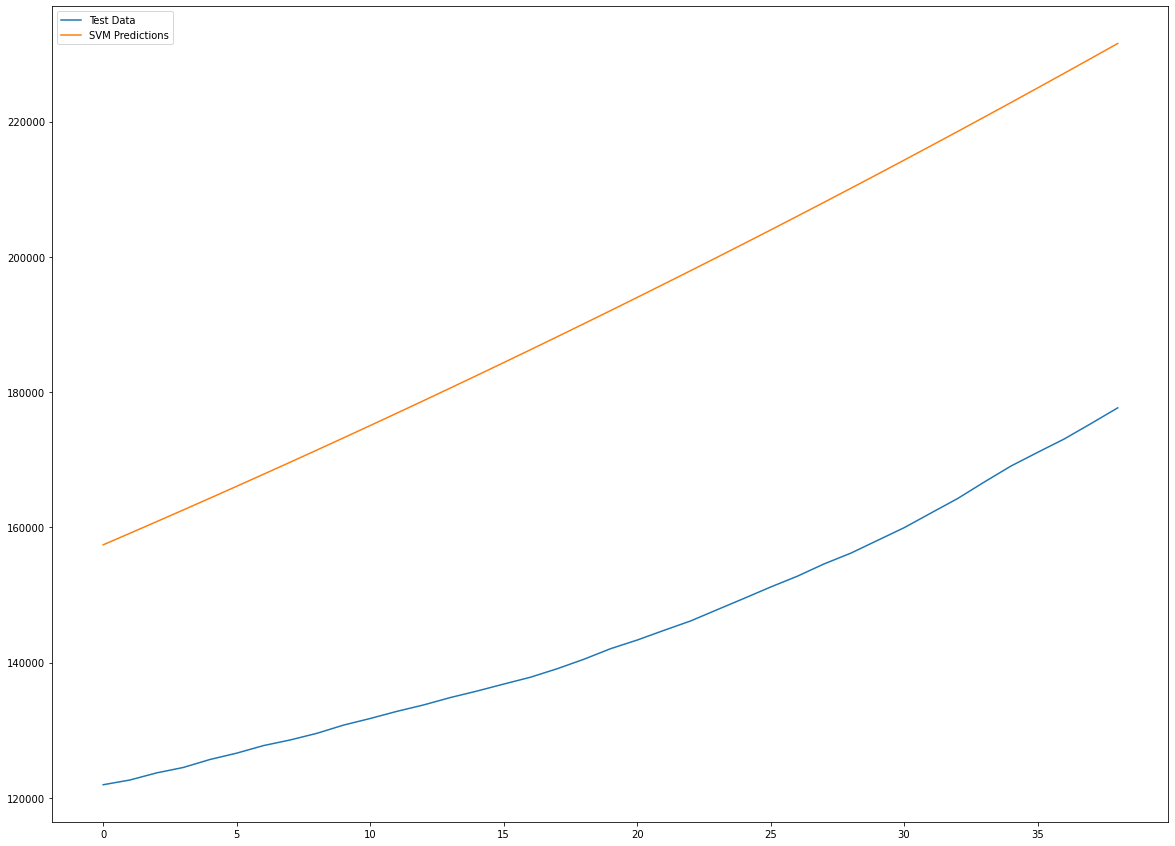

In [59]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.figure(figsize=(20,15))
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

#### Mean Absolute percentage error
I prefer to use mean absolute percent error because it gives an simple percentage to communicate that shows how off the predictions are. MAPE is not included in Sklearn, so a custom feature must be used.

In [60]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [61]:
print('Mean absolute percentage error of SVM is ',mean_absolute_percentage_error(y_test_confirmed,svm_test_pred))

Mean absolute percentage error of SVM is  33.10430193025754


## Linear Regression model

In [62]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

In [63]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))


MAE: 7819.632665020879
MSE: 88004501.9507462


#### Mean Absolute percentage error


In [64]:
print('Mean absolute percentage error of LR is ', mean_absolute_percentage_error(y_test_confirmed,test_linear_pred))

Mean absolute percentage error of LR is  5.073528140517091


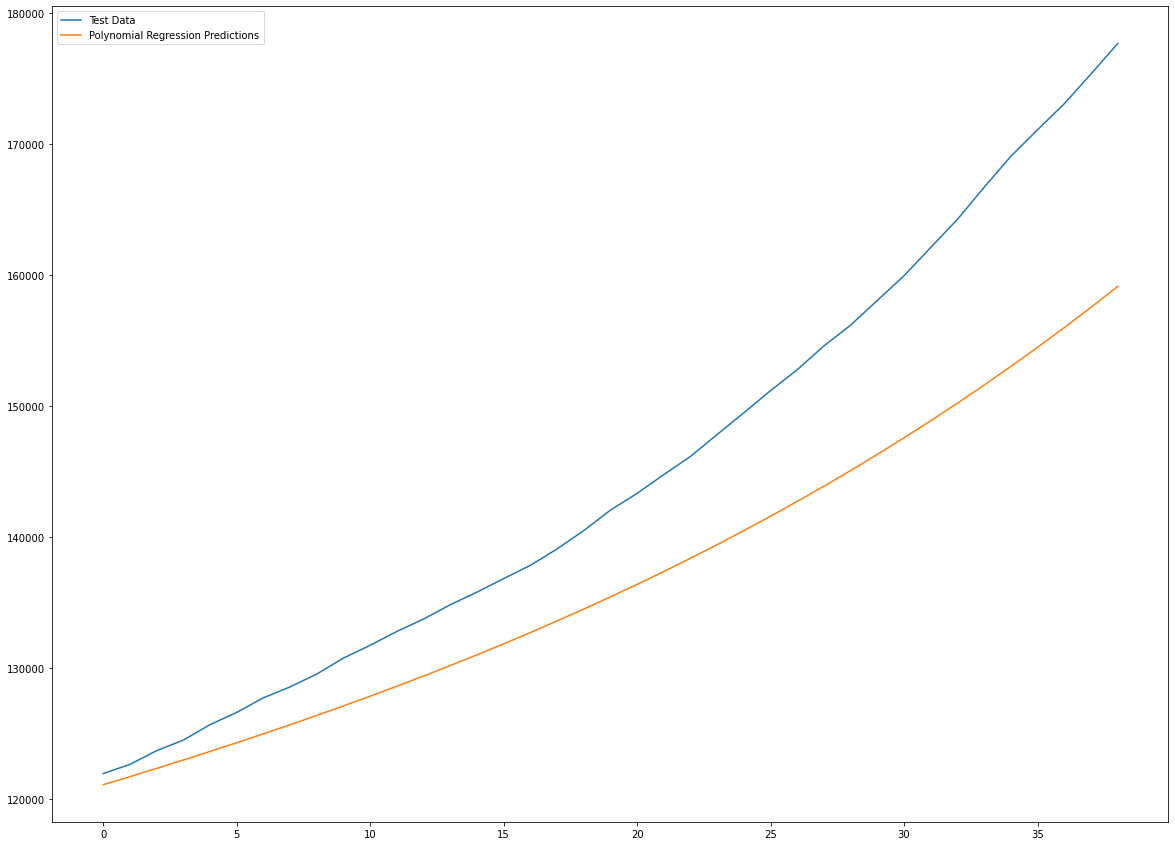

In [65]:
plt.figure(figsize=(20,15))
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [66]:
# confirmed_df.head()

In [67]:
# Transposing the row for time series analysis

confirmed_df = confirmed_df.T
confirmed_df = confirmed_df.rename(columns=confirmed_df.iloc[1])
# confirmed_df

In [68]:
confirmed_df = confirmed_df[4:]
# confirmed_df

In [69]:
confirmed_df['Total_cases'] = confirmed_df.sum(axis=1)

In [70]:
# converting the index column to date

confirmed_df.reset_index(level=0,inplace=True)
# confirmed_df

In [71]:
confirmed_df['dates'] = pd.to_datetime(confirmed_df['index'])
# confirmed_df.info()

In [72]:
time_series_analysis_df = confirmed_df[['Total_cases','dates']]
# time_series_analysis_df

In [73]:
# Now we will set the dates column as the index of the dataframe to allow us really explore the our data.

time_series_analysis_df = time_series_analysis_df.set_index('dates')
time_series_analysis_df

,Total_cases
dates,
2020-01-22,555.0
2020-01-23,654.0
2020-01-24,941.0
2020-01-25,1434.0
2020-01-26,2118.0
...,...
2020-11-20,57579266.0
2020-11-21,58165570.0
2020-11-22,58649369.0


#### XGBoost

In [74]:
from pandas import read_csv
from matplotlib import pyplot
import xgboost as xgb
from xgboost import plot_importance, plot_tree
plt.style.use('fivethirtyeight')

In [77]:
#save your file

# path = r'C:\Users\yrsin\Desktop\Fall2020\databasemanagement\Homework\CPSC-671\covid_data\Data\Covid-19'
# time_series_analysis_df.to_csv(path+'\series.csv')

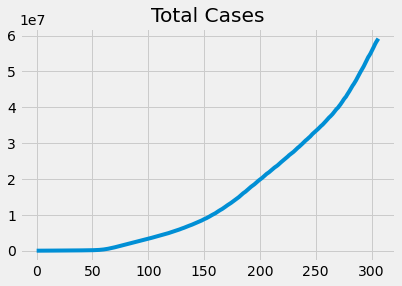

In [78]:
# load dataset
series = pd.read_csv('../input/covid-predictions/covid_data/Data/Covid-19/series.csv', header=0, index_col=0)
values = series.values
# plot dataset
pyplot.plot(values)
pyplot.title('Total Cases')
pyplot.show()

 - We are using the XGBoost model on the dataset when making one-step forecasts for the data from September month.
 - We will use previous 10 time steps as input to the model and default model hyperparameters, except we will change the loss to 'reg:sqarederror' and use 1,000 trees in the ensemble.

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:96: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



>expected=29267550.0, predicted=28987872.0
>expected=29551603.0, predicted=29267544.0
>expected=29856431.0, predicted=29551598.0
>expected=30170401.0, predicted=29856426.0
>expected=30493918.0, predicted=30170394.0
>expected=30773468.0, predicted=30493912.0
>expected=31016493.0, predicted=30773462.0
>expected=31314948.0, predicted=31016486.0
>expected=31594705.0, predicted=31314942.0
>expected=31861932.0, predicted=31594698.0
>expected=32224527.0, predicted=31861926.0
>expected=32552391.0, predicted=32224522.0
>expected=32829296.0, predicted=32552386.0
>expected=33070411.0, predicted=32829290.0
>expected=33346477.0, predicted=33070406.0
>expected=33631210.0, predicted=33346470.0
>expected=33958022.0, predicted=33631196.0
>expected=34275929.0, predicted=33958012.0
>expected=34571293.0, predicted=34275908.0
>expected=34889925.0, predicted=34571280.0
>expected=35138390.0, predicted=34889908.0
>expected=35467774.0, predicted=35138372.0
>expected=35793123.0, predicted=35467764.0
>expected=3

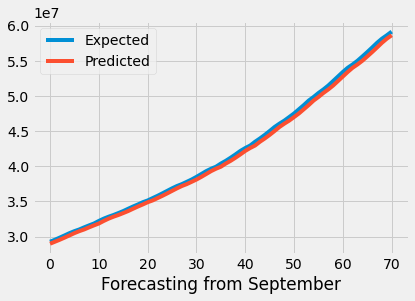

In [80]:
# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict(asarray([testX]))
	return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])

		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions

# load the dataset
series = read_csv('../input/covid-predictions/covid_data/Data/Covid-19/series.csv', header=0, index_col=0)
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=10)
# evaluate
mae, y, yhat = walk_forward_validation(data, 71)
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.xlabel("Forecasting from September")
pyplot.legend()
pyplot.show()

In [81]:
print('Mean absolute percentage error of XGBosst is',mean_absolute_percentage_error(y,yhat))

Mean absolute percentage error of XGBosst is 0.9998448744116005


## Persistance model for timeseries forecasting

The persistence forecast is where the observation from the prior time step (t-1) is used to predict the observation at the current time step (t).

We can implement this by taking the last observation from the training data and history accumulated by walk-forward validation and using that to predict the current time step.

In [82]:
from pandas import concat
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
from pandas import datetime

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



(230, 1) (78, 1)
RMSE: 435564.994
0.9979085252842197


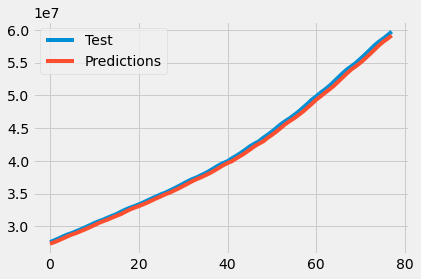

In [83]:
X = time_series_analysis_df.values
train, test = X[0:230], X[230:]
print(train.shape, test.shape)

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	predictions.append(history[-1])
	# observation
	history.append(test[i])
# report performance
rmse = sqrt(mean_squared_error(test, predictions))

print('RMSE: %.3f' % rmse)
print(mean_absolute_percentage_error(test,predictions))
from matplotlib import pyplot

# line plot of observed vs predicted
pyplot.plot(test,label='Test')
pyplot.plot(predictions, label = 'Predictions')
plt.legend(labels=('Test','Predictions'))
pyplot.show()

#### LSTM in Keras

The Long Short-Term Memory network (LSTM) is a type of Recurrent Neural Network (RNN).

A benefit of this type of network is that it can learn and remember over long sequences and does not rely on a pre-specified window lagged observation as input.

In Keras, this is referred to as stateful, and involves setting the “stateful” argument to “True” when defining an LSTM layer.

By default, an LSTM layer in Keras maintains state between data within one batch. A batch of data is a fixed-sized number of rows from the training dataset that defines how many patterns to process before updating the weights of the network. State in the LSTM layer between batches is cleared by default, therefore we must make the LSTM stateful. This gives us fine-grained control over when state of the LSTM layer is cleared, by calling the reset_states() function.

The LSTM layer expects input to be in a matrix with the dimensions: [samples, time steps, features].

Samples: These are independent observations from the domain, typically rows of data.
Time steps: These are separate time steps of a given variable for a given observation.
Features: These are separate measures observed at the time of observation.
We have some flexibility in how the Total cases dataset is framed for the network. We will keep it simple and frame the problem as each time step in the original sequence is one separate sample, with one timestep and one feature.

Given that the training dataset is defined as X inputs and y outputs, it must be reshaped into the Samples/TimeSteps/Features format, for example:

Batch Size: 1
Epochs: 1500
Neurons: 1

dates
2020-01-22     555.0
2020-01-23     654.0
2020-01-24     941.0
2020-01-25    1434.0
2020-01-26    2118.0
Name: Total_cases, dtype: float64
day=1, Predicted=27819966.030419, Expected=27856051.000000
day=2, Predicted=28130713.492246, Expected=28155066.000000
day=3, Predicted=28430376.564068, Expected=28474880.000000
day=4, Predicted=28752036.466502, Expected=28752073.000000
day=5, Predicted=29020505.128764, Expected=28987878.000000
day=6, Predicted=29226920.526065, Expected=29267550.000000
day=7, Predicted=29541567.878672, Expected=29551603.000000
day=8, Predicted=29822963.639720, Expected=29856431.000000
day=9, Predicted=30132989.441391, Expected=30170401.000000
day=10, Predicted=30447281.897321, Expected=30493918.000000
day=11, Predicted=30770968.304834, Expected=30773468.000000
day=12, Predicted=31042962.202195, Expected=31016493.000000
day=13, Predicted=31262284.552076, Expected=31314948.000000
day=14, Predicted=31593205.633974, Expected=31594705.000000
day=15, Predicted=318639

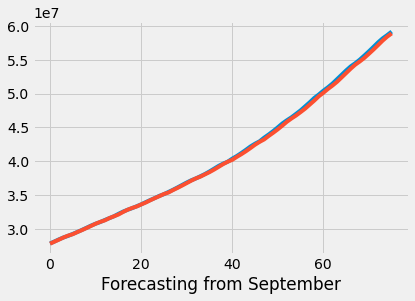

In [85]:
def parser(x):
    return datetime.strptime(x,'%Y-%m-%d')

def timeseries_to_supervised(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]


series = pd.read_csv('../input/covid-predictions/covid_data/Data/Covid-19/series.csv', header = 0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())


raw_values = series.values
diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:230], supervised_values[230:]
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 1500, 1)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 
# report performance
rmse = sqrt(mean_squared_error(raw_values[231:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[231:])
pyplot.plot(predictions)
pyplot.xlabel('Forecasting from September')
pyplot.show()

In [86]:
print('Mean absolute percentage error of LSTM is ',mean_absolute_percentage_error(raw_values[231:], predictions))

Mean absolute percentage error of LSTM is  0.33245717182034745


#### Additive model 
 1. This model is used when the time series level does not vary with the variations around the trend. Here, the time series components are simply added together using the formula:
     - y(t) = Level(t) + Trend(t) + Seasonality(t) + Noise(t)

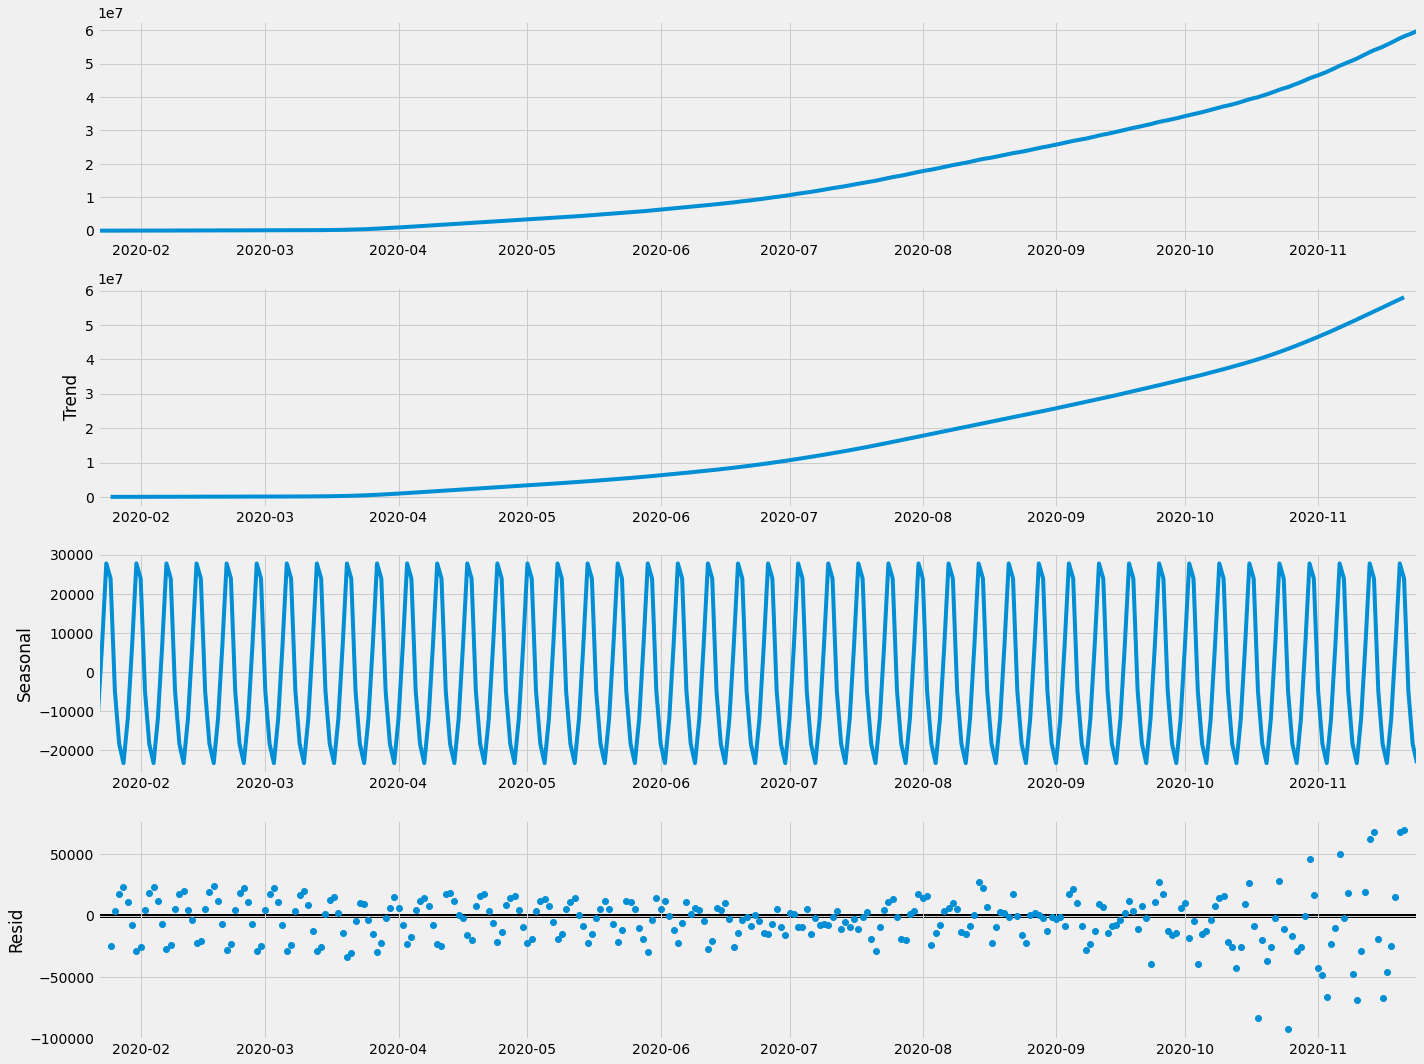

In [132]:
import matplotlib
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(time_series_analysis_df,model='additive')
fir = decomposition.plot()
matplotlib.rcParams['figure.figsize']=[20.0,15.0]

 -  Here we can see that trend is continously going up, **Total number of cases grew from 10 million in month of july to 40 million in the month of october.**
 - The increase in the number of the cases can be attributed to some of the severly affected country mentioned above in the discussion.
 - The sesonality shows us a sinusoidal trend which can be attributed to continous increasing trend in the number of confirmed cases.
 - we can see some noise components in later months of **august, september, and october** which can be attributed to poorly affected countries above mentioned.

#### Time Series Forecasting with Arima (Autoregressive Integrated Moving Average)

With the notation ARIMA(p, d, q), ARIMA models are denoted. The seasonality, pattern, and noise in the data account for these three parameters

In [88]:
import itertools

In [89]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


#### Parameter Selection

In [90]:
# Use this for parameter selection

# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(time_series_analysis_df,
#                                             order=param,
#                                             seasonal_order=param_seasonal,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)
#             results = mod.fit()
#             print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#         except:
#             continue

The above output suggests that SARIMAX(1, 1, 1)x(1, 1, 1, 12) yields the lowest AIC value.

#### Fitting the model

In [91]:
mod = sm.tsa.statespace.SARIMAX(time_series_analysis_df,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0099      0.002    455.370      0.000       1.006       1.014
ma.L1         -0.7219      0.075     -9.597      0.000      -0.869      -0.574
ar.S.L12      -0.1878      0.115     -1.637      0.102      -0.413       0.037
ma.S.L12      -1.0702      0.045    -23.744      0.000      -1.159      -0.982
sigma2      1.946e+09    7.4e-12   2.63e+20      0.000    1.95e+09    1.95e+09


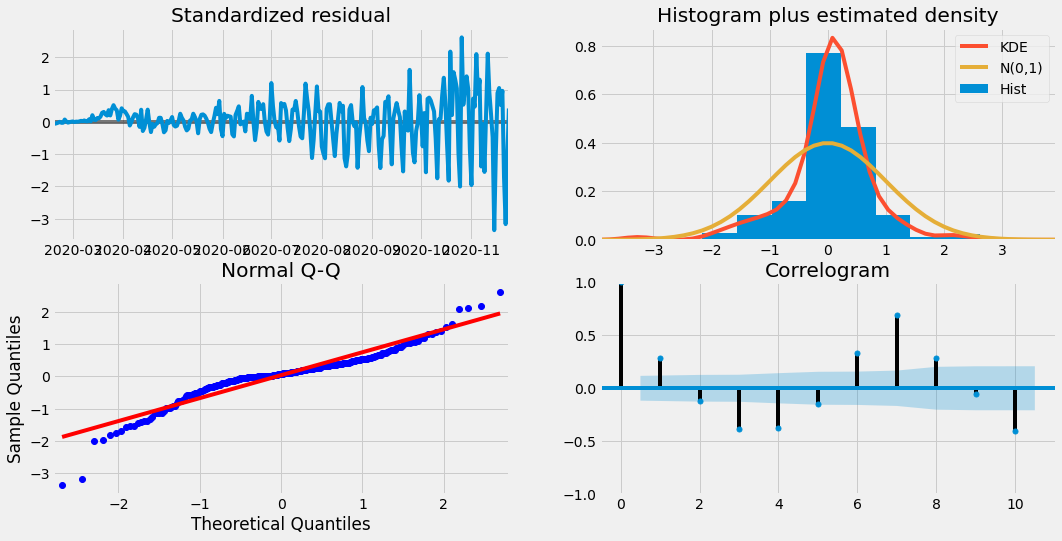

In [92]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

#### Validation of forecasts

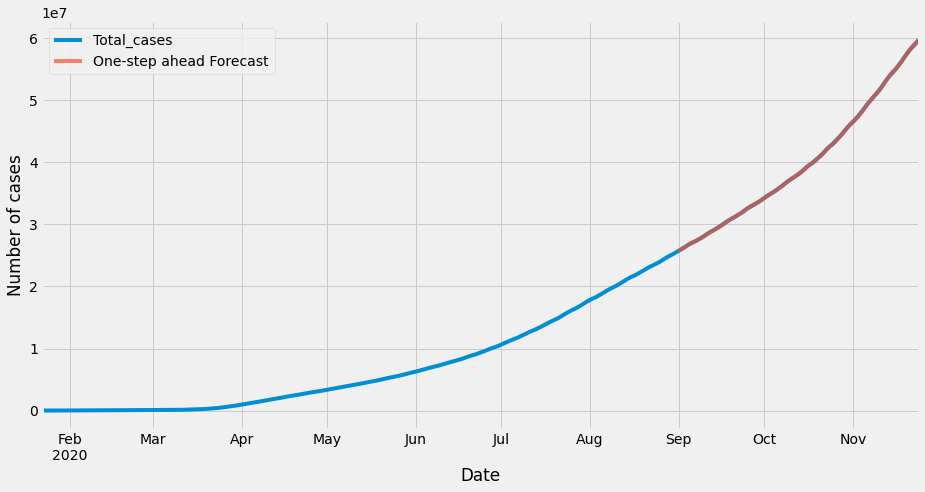

In [93]:
pred = results.get_prediction(start=pd.to_datetime('2020-09-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = time_series_analysis_df.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Number of cases')
plt.legend()
plt.show()

In [94]:
y_forecasted = pred.predicted_mean
# print(y_forecasted)
# time_series_analysis_df['Total_cases']['2020-09-01':]
y_truth = time_series_analysis_df['Total_cases']['2020-09-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2581124616.23


In [95]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 50804.77


#### Mean Absolute percentage error

In [96]:
mean_absolute_percentage_error(y_truth,y_forecasted)

0.09918881458288886

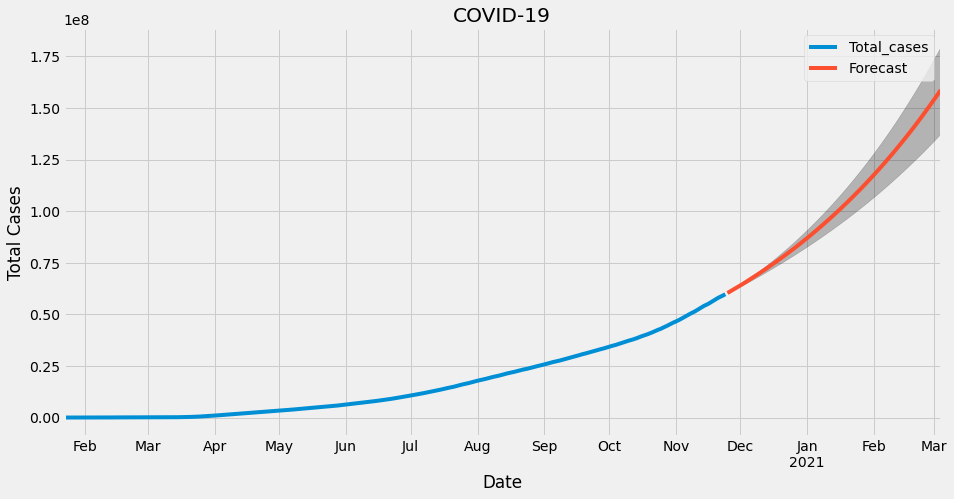

In [97]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = time_series_analysis_df['Total_cases'].plot(label='Total_cases', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_title('COVID-19')
ax.set_xlabel('Date')
ax.set_ylabel('Total Cases')
plt.legend()
plt.show()

 - **Future Forecasting**
 - We used Arima model from stats to predict future values as mean absolute percentage error of ARIMA model is very low **~0.098%**
 - Our model predicts that in the month of **Jan2021** we will have around [60million, 90million] cases.
 - As we move further in the future the confidence interval of prediction drops because this model doesn't take into account various policies that have been implemented by countries to curb the spread the of the virus. 